In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#read input data file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/eye_state.csv


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.backend import sign
from keras import optimizers

Using TensorFlow backend.


In [3]:
# change format to dataframe and add column names
fpath='/kaggle/input/eye_state.csv'
df=pd.read_csv(fpath, header=0, names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'Target'])
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0


In [4]:
# check missing data in file
df.isna().sum()

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
Target    0
dtype: int64

In [5]:
# normalize the data
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,0.001085,-0.112049,0.671413,-0.003111,0.008909,-0.019610,-0.002817,0.782290,-0.003771,-0.122092,0.138509,0.006194,0.014578,-0.005489,-0.902395
1,0.002316,-0.067427,0.705851,-0.001637,-0.138765,-0.020663,-0.002930,0.484938,-0.005213,-0.243509,0.111515,0.067815,0.011185,-0.004618,-0.902395
2,0.002730,0.044018,0.729035,-0.001734,0.053240,-0.021016,-0.002817,0.502349,-0.000649,0.106812,0.220021,0.203573,0.014156,-0.003399,-0.902395
3,0.001698,0.044018,0.636750,-0.002620,0.171264,-0.019610,-0.003152,0.397201,-0.003771,0.335979,0.274274,0.216090,0.014578,-0.003052,-0.902395
4,-0.000356,-0.112049,0.451955,-0.002227,0.112252,-0.019436,-0.003710,0.029522,-0.007614,0.039533,0.192762,0.043263,0.010763,-0.004532,-0.902395


In [6]:
# prepare df for target results
y=pd.DataFrame({'Target':df['Target']})
y['Target']=y['Target'].astype(int)
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [7]:
# remove results from the input df
df = df.drop(columns=['Target'])
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.001085,-0.112049,0.671413,-0.003111,0.008909,-0.019610,-0.002817,0.782290,-0.003771,-0.122092,0.138509,0.006194,0.014578,-0.005489
1,0.002316,-0.067427,0.705851,-0.001637,-0.138765,-0.020663,-0.002930,0.484938,-0.005213,-0.243509,0.111515,0.067815,0.011185,-0.004618
2,0.002730,0.044018,0.729035,-0.001734,0.053240,-0.021016,-0.002817,0.502349,-0.000649,0.106812,0.220021,0.203573,0.014156,-0.003399
3,0.001698,0.044018,0.636750,-0.002620,0.171264,-0.019610,-0.003152,0.397201,-0.003771,0.335979,0.274274,0.216090,0.014578,-0.003052
4,-0.000356,-0.112049,0.451955,-0.002227,0.112252,-0.019436,-0.003710,0.029522,-0.007614,0.039533,0.192762,0.043263,0.010763,-0.004532


In [8]:
# change input format from df to array
df=np.array(df)
y=np.array(y)

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.3)
print("Input shape ", df.shape)
print("Train data shapes ", X_train.shape,", ", Y_train.shape) 
print("Test data shapes ", X_test.shape,", ", Y_test.shape)

Input shape  (14979, 14)
Train data shapes  (10485, 14) ,  (10485, 1)
Test data shapes  (4494, 14) ,  (4494, 1)


In [10]:
# change input dimensions to 3 for LSTM input
X_train = np.reshape(X_train, (10485, 14, 1))
X_test = np.reshape(X_test, (4494, 14, 1))

# Train the LSTM model

In [11]:
# LSTM model
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.15))
model.add(Dense(1, activation="sigmoid"))

model.summary()

adam_modified = optimizers.Adam(learning_rate=0.005, beta_1=0.7, beta_2=0.9, amsgrad=False)

model.compile(loss="binary_crossentropy", optimizer=adam_modified, metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=80)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
10485/10485 [==============================] - 7s 663us/step - loss: 0.6808 - accuracy: 0.5566
Epoch 2/80
10485/10485 [==============================] - 5s 507us/step - loss: 0.6728 - accuracy: 0.5660
Epoch 3/80
10485/10485 [==============================] - 6s 532us/step - loss: 0.6484 - accuracy: 0.6075
Epoch 4/80
10485/10485 [==============================] - 5s 4

10485/10485 [==============================] - 5s 499us/step - loss: 0.0946 - accuracy: 0.9622
Epoch 71/80
10485/10485 [==============================] - 5s 510us/step - loss: 0.0918 - accuracy: 0.9655
Epoch 72/80
10485/10485 [==============================] - 6s 579us/step - loss: 0.0882 - accuracy: 0.9695
Epoch 73/80
10485/10485 [==============================] - 5s 493us/step - loss: 0.0933 - accuracy: 0.9659
Epoch 74/80
10485/10485 [==============================] - 5s 514us/step - loss: 0.0909 - accuracy: 0.9670
Epoch 75/80
10485/10485 [==============================] - 5s 503us/step - loss: 0.0935 - accuracy: 0.9664
Epoch 76/80
10485/10485 [==============================] - 5s 498us/step - loss: 0.0817 - accuracy: 0.9698
Epoch 77/80
10485/10485 [==============================] - 5s 467us/step - loss: 0.0846 - accuracy: 0.9692
Epoch 78/80
10485/10485 [==============================] - 5s 483us/step - loss: 0.0815 - accuracy: 0.9716
Epoch 79/80
10485/10485 [========================

In [12]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(20,1))
    plt.plot(test, color='blue',label='Actual eye state')
    plt.plot(predicted, color='orange',label='Predicted eye state')
    # plt.title(title)
    plt.xlabel('Sample number')
    plt.ylabel('Eye state')
    # plt.legend()
    plt.show()

In [13]:
predictions = model.predict_classes(X_test)
Y_test=Y_test.astype('int32')

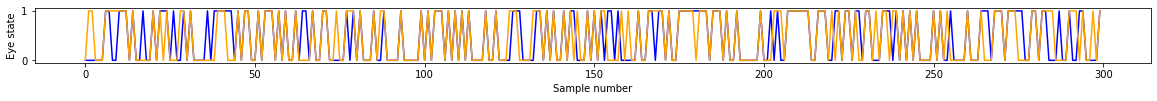

In [14]:
plot_predictions(Y_test[0:300], predictions[0:300], "Predictions made by LSTM model")

In [15]:
accuracy_score(Y_test, predictions)

0.8186470850022252

# Apply adversarial attack

In [16]:
predictions = predictions[:,0]
Y_test = Y_test[:,0]

In [17]:
X_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(X_tf)
    lossFunction = mean_squared_error(X_tf, predictions)
gradientFunction = tape.gradient(lossFunction, X_tf)
signed_grad = tf.sign(gradientFunction)
perturbed_data = X_test + 0.2 * signed_grad
X_perturbed = perturbed_data.numpy()

In [18]:
adversarial_predictions = model.predict_classes(X_perturbed)
accuracy_score(Y_test, adversarial_predictions)

0.6428571428571429

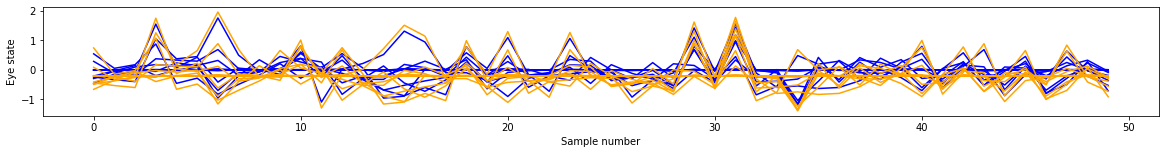

In [19]:
x_test_plot = X_test[:, :, 0]
x_perturbed_plot = X_perturbed[:, :, 0]
plt.figure(figsize=(20,2))
plt.plot(x_test_plot[:50], color='blue',label='Actual data')
plt.plot(x_perturbed_plot[:50], color='orange',label='Perturbated data')
plt.xlabel('Sample number')
plt.ylabel('Eye state')
plt.show()

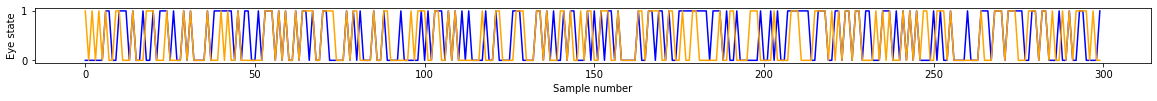

In [20]:
adversarial_predictions = model.predict_classes(X_perturbed)
plot_predictions(Y_test[0:300], adversarial_predictions[0:300], "Predictions made by LSTM model")

In [21]:
accuracy_score(Y_test, adversarial_predictions)

0.6428571428571429